
Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Missing Values:

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Statistical Summary:

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420    

<ipython-input-3-4417c8829d84>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Species'], palette='pastel')


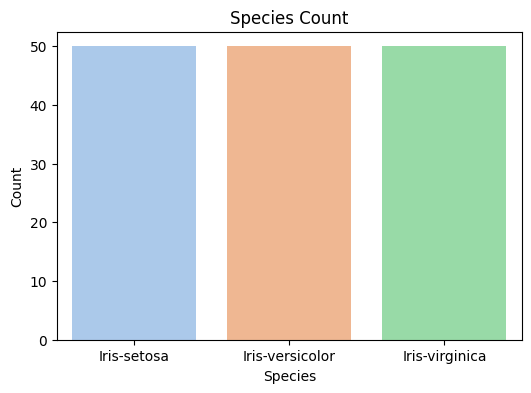

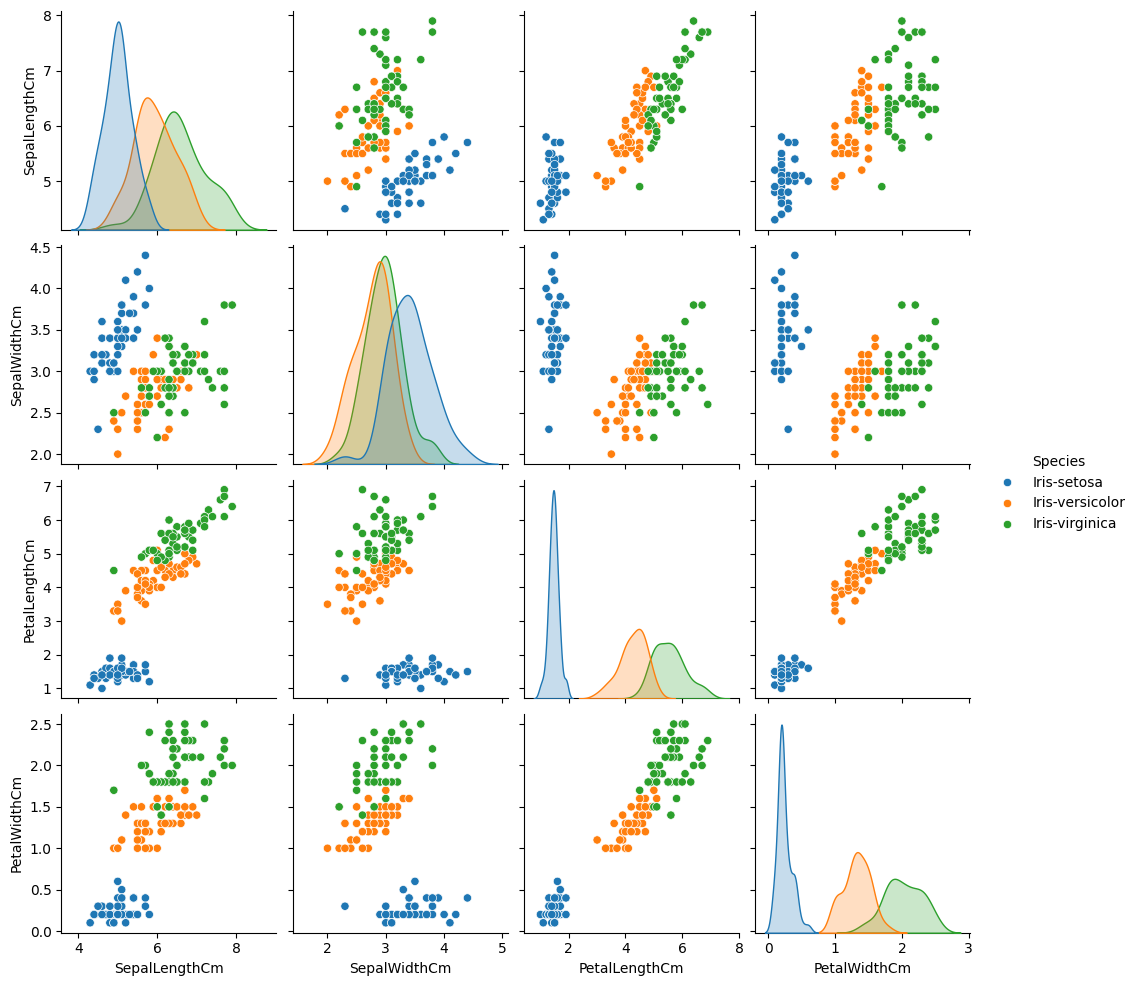

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


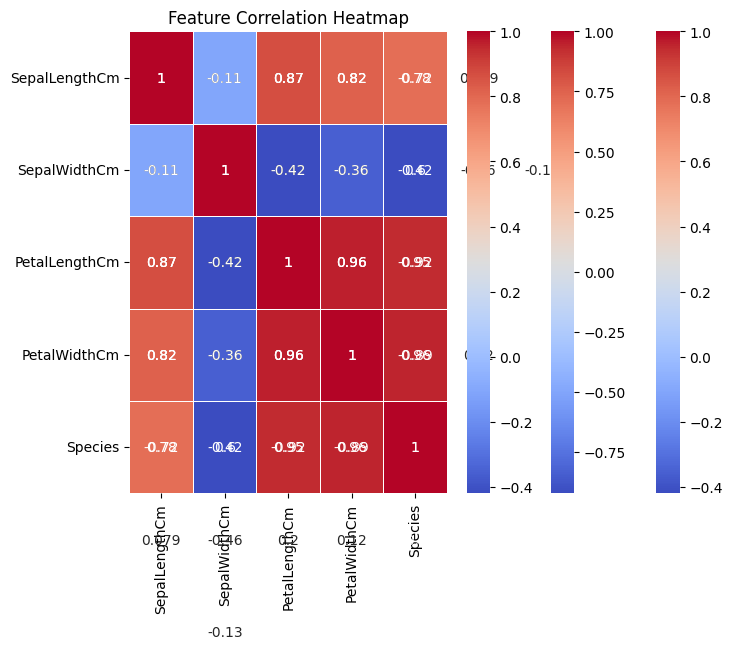

<ipython-input-3-4417c8829d84>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=df[feature], data=df, palette='coolwarm')


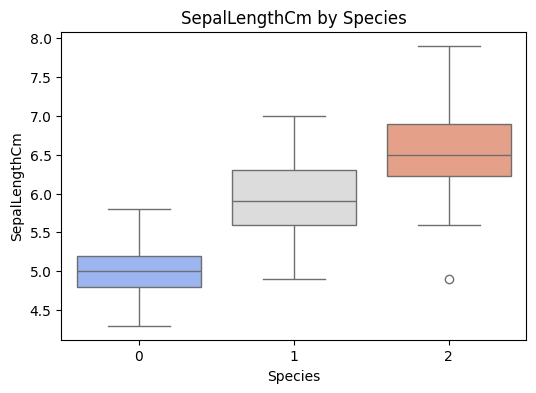

<ipython-input-3-4417c8829d84>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=df[feature], data=df, palette='coolwarm')


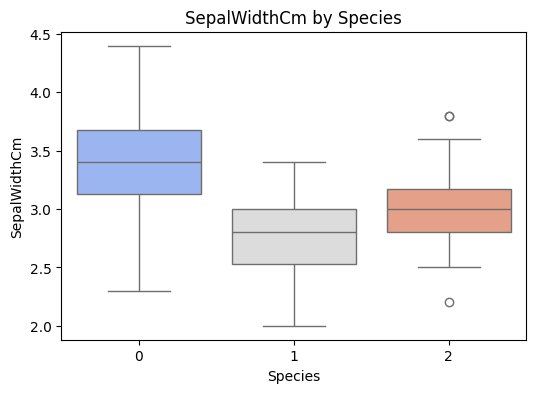

<ipython-input-3-4417c8829d84>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=df[feature], data=df, palette='coolwarm')


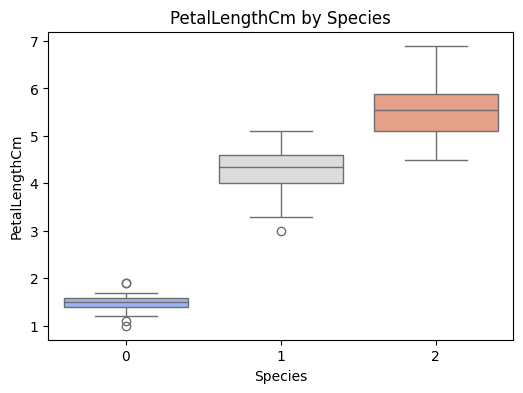

<ipython-input-3-4417c8829d84>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Species', y=df[feature], data=df, palette='coolwarm')


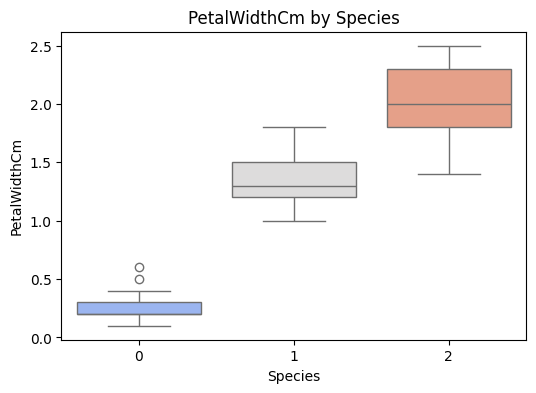


Analysis Complete! Check the visualizations for insights.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "/Iris.csv"
df = pd.read_csv(file_path)

# Display basic info
def dataset_overview(df):
    print("\nDataset Info:\n")
    print(df.info())
    print("\nMissing Values:\n")
    print(df.isnull().sum())
    print("\nStatistical Summary:\n")
    print(df.describe())

dataset_overview(df)

# Drop ID column as it's not useful for analysis
df = df.drop(columns=['Id'])

# Visualizing Species Count
plt.figure(figsize=(6, 4))
sns.countplot(x=df['Species'], palette='pastel')
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

# Pairplot to visualize relationships
sns.pairplot(df, hue='Species', diag_kind='kde')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
print(df.dtypes)
df_numeric = df.select_dtypes(include=['number'])  # Keep only numerical columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
df_encoded = df.copy()
df_encoded = pd.get_dummies(df_encoded)  # One-hot encoding
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])  # Convert text to numbers
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)

print(df_numeric.isnull().sum())
df_numeric = df_numeric.dropna()  # Drop NaNs
# OR
df_numeric = df_numeric.fillna(df_numeric.mean())  # Replace NaNs with mean
plt.title('Feature Correlation Heatmap')
plt.show()

# Boxplots for feature distributions
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Species', y=df[feature], data=df, palette='coolwarm')
    plt.title(f'{feature} by Species')
    plt.xlabel('Species')
    plt.ylabel(feature)
    plt.show()

print("\nAnalysis Complete! Check the visualizations for insights.")